# **Importing Dataset from Kaggle**


In [ ]:
from google.colab import files

files.upload()
# files.download("/content/detect_mask.model")

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d johndasilva/diabetes

In [ ]:
! unzip /content/diabetes.zip

Archive:  /content/diabetes.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

# **EDA**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Data Visualisation**

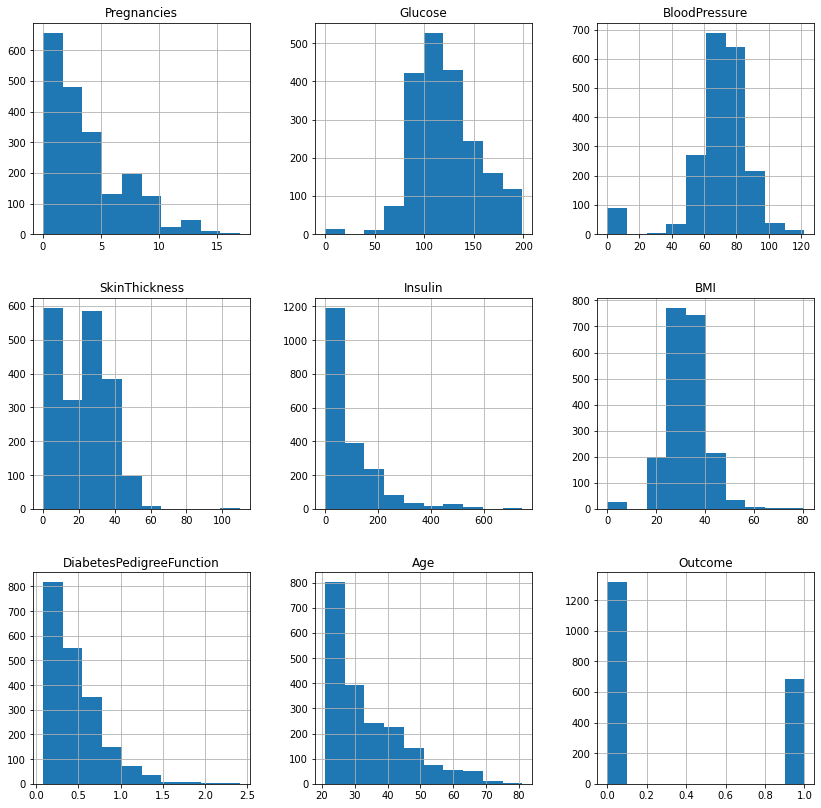

In [ ]:
numbers = pd.Series(df.columns)
df[numbers].hist(figsize = (14, 14))
plt.show()

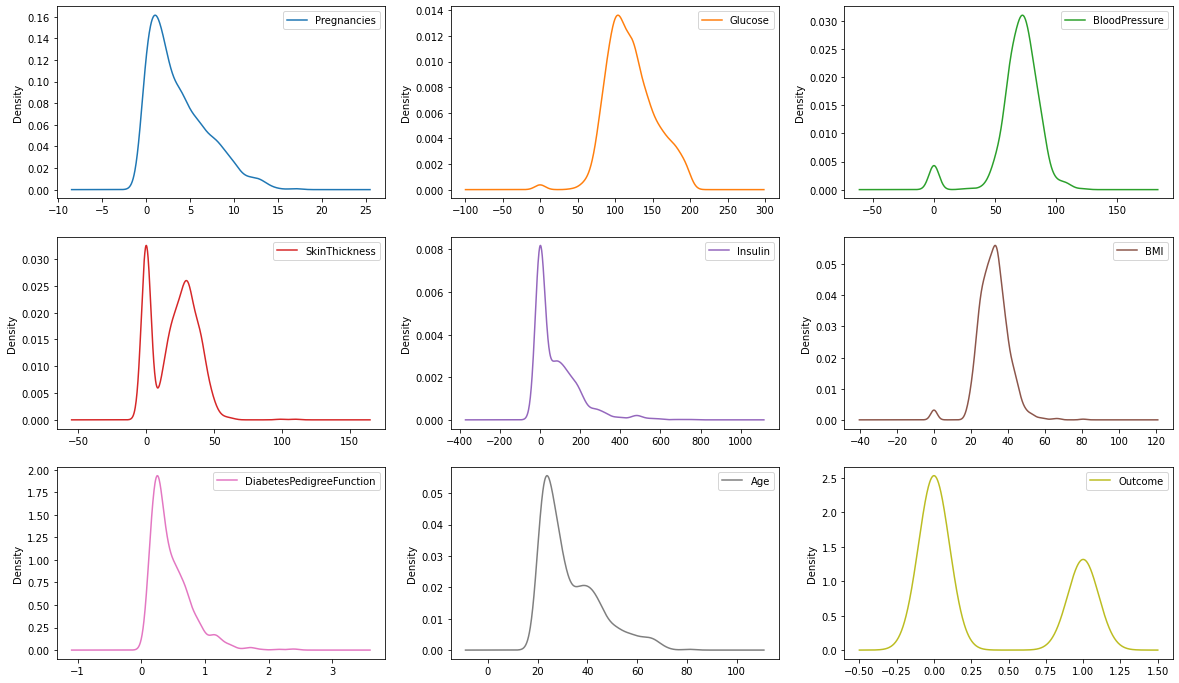

In [ ]:
df.plot(kind = 'density', subplots= True, layout = (3,3), sharex =False, figsize = (20, 12));

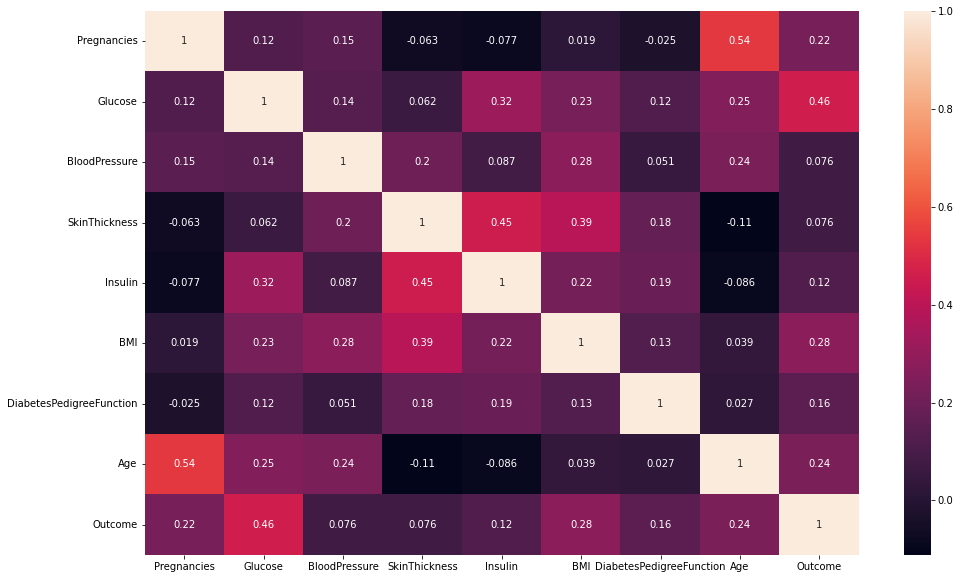

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True);

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Outcome')]

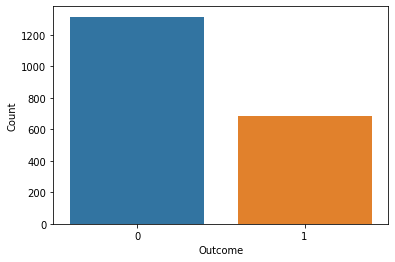

In [ ]:
p = sns.barplot(data=df, x=[0,1], y=df.Outcome.value_counts())
p.set( xlabel = "Outcome", ylabel = "Count")

# **Model Selection**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {"n_neighbors": np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=16)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=16, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
print("Best KNN score:" + str(knn_cv.best_score_))
print("Best KNN parameter: " + str(knn_cv.best_params_))

Best KNN score:0.965
Best KNN parameter: {'n_neighbors': 1}


In [ ]:
train_res = knn_cv.cv_results_['mean_test_score']
train_res

array([0.965   , 0.898125, 0.845625, 0.799375, 0.795625, 0.804375,
       0.791875, 0.771875, 0.766875, 0.7775  ])

In [ ]:
test_arr = np.zeros(10)
train_arr = np.zeros(10)

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  train_arr[i-1] = knn.score(x_train,y_train)
  test_arr[i-1] = accuracy_score(y_test,pred)

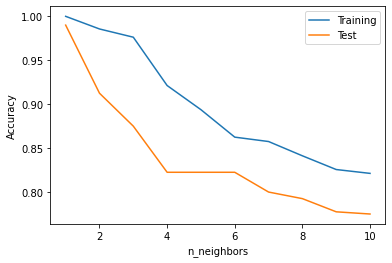

In [ ]:
plt.plot(np.arange(1,11), train_arr, label='Training')
plt.plot(np.arange(1,11), test_arr, label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

C_val = [0.01,1,100]
test_arr = np.zeros(3)
train_arr = np.zeros(3)

for i in range(3):
  lr_model = LogisticRegression(C=C_val[i], max_iter=150)
  lr_model = lr_model.fit(x_train,y_train)

  pred = lr_model.predict(x_test)
  test_arr[i] = accuracy_score(y_test, pred)
  train_arr[i] = lr_model.score(x_train, y_train)

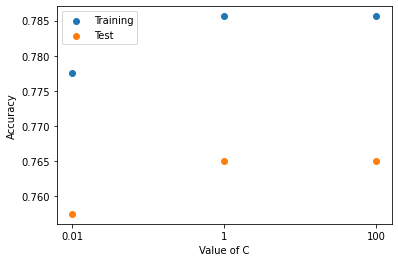

In [ ]:
xi = [0,1,2]
plt.scatter(xi, train_arr, label='Training')
plt.scatter(xi, test_arr, label='Test')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.xticks(xi,C_val)
plt.legend()
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
pred = dct.predict(x_test)
print('Training Accuracy: ', dct.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  1.0

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       257
           1       0.99      0.98      0.98       143

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



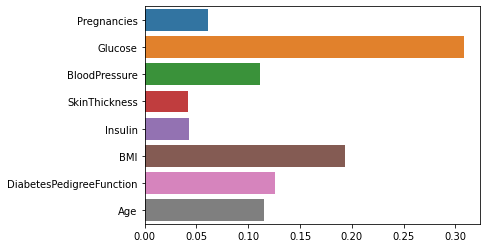

In [ ]:
sns.barplot(x=dct.feature_importances_, y=dct.feature_names_in_)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print('Training Accuracy: ', rfc.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  1.0

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       257
           1       0.99      0.96      0.97       143

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



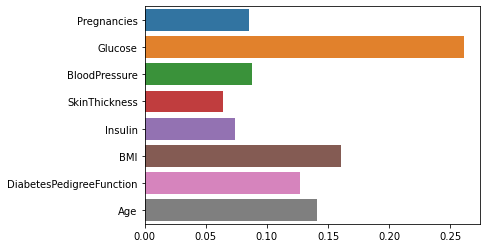

In [ ]:
sns.barplot(x=rfc.feature_importances_, y=rfc.feature_names_in_)

# **SVM (with all kernels)**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = "sigmoid")
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
print('Training Accuracy: ', svm.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  0.484375

               precision    recall  f1-score   support

           0       0.56      0.60      0.58       257
           1       0.16      0.14      0.15       143

    accuracy                           0.44       400
   macro avg       0.36      0.37      0.37       400
weighted avg       0.42      0.44      0.43       400



In [ ]:
svm = SVC(kernel = "poly")
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
print('Training Accuracy: ', svm.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  0.78125

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       257
           1       0.73      0.55      0.62       143

    accuracy                           0.77       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.76      0.77      0.76       400



In [ ]:
svm = SVC(kernel = "rbf")
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
print('Training Accuracy: ', svm.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  0.77625

               precision    recall  f1-score   support

           0       0.78      0.88      0.83       257
           1       0.72      0.57      0.64       143

    accuracy                           0.77       400
   macro avg       0.75      0.72      0.73       400
weighted avg       0.76      0.77      0.76       400



In [ ]:
svm = SVC(kernel = "linear")
svm.fit(x_train, y_train)

pred = svm.predict(x_test)
print('Training Accuracy: ', svm.score(x_train, y_train))
print('\n',classification_report(y_test, pred))

Training Accuracy:  0.77875

               precision    recall  f1-score   support

           0       0.80      0.87      0.83       257
           1       0.72      0.61      0.66       143

    accuracy                           0.78       400
   macro avg       0.76      0.74      0.75       400
weighted avg       0.77      0.78      0.77       400



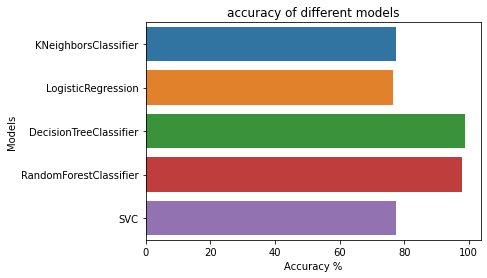

In [ ]:
models = [
    knn,
    lr_model,
    dct,
    rfc,
    svm,
]


results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[name, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results)
plt.xlabel('Accuracy %')
plt.title('accuracy of different models')
plt.show()